In [4]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import squarify as sqf
import seaborn as sns

In [5]:
dados = pd.read_csv('acidentes_ambientais.csv', sep=',', encoding='UTF-8')
pd.DataFrame(dados)

C:\Users\Alexandre\AppData\Local\Temp\ipykernel_8524\880953677.py:1: DtypeWarning: Columns (11,23) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv('acidentes_ambientais.csv', sep=',', encoding='UTF-8')


,FID,uuid,id_ocorrencia,id_municipio,id_uf,id_responsavel,des_complemento_tipo_localizaca,des_complemento_tipo_evento,des_complemento_instituicao_atu,des_complemento_tipo_dano_ident,...,dia_semana_primeira_obs,dia_semana_registro,institiuicoes_atuando_local,tipos_fontes_informacoes,tipos_danos_identificados,produtos_onu,produtos_outro,geom,dt_carga,feicao_proxima
0,adm_comunicacidente_p.fid--3632ffb4_183a01d739...,58852510-e800-4d5b-8cec-e2a6e9a37748,312,2706901.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Corpo de Bombeiros;Polícia Rodoviária,Mídia,Óbitos/feridos,NaN,NaN,POINT (-35.9511275 -9.6016711),2022-09-27T20:44:12,NaN
1,adm_comunicacidente_p.fid--3632ffb4_183a01d739...,2ea84fdc-4bd7-40ab-aeb5-06426572d339,313,3205309.0,8.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Corpo de Bombeiros,Mídia,Outro(s),NaN,NaN,POINT (-40.3016327 -20.2996826),2022-09-27T20:44:12,NaN
2,adm_comunicacidente_p.fid--3632ffb4_183a01d739...,29be7ae3-3190-4b40-bdfe-a0516bf20ac1,314,5003702.0,12.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Outra(s),Mídia,Fauna;Flora;População afetada/evacuada;Rio/cór...,NaN,NaN,POINT (-54.812208 -22.2206145),2022-09-27T20:44:12,NaN
3,adm_comunicacidente_p.fid--3632ffb4_183a01d739...,d896a564-adba-4332-86d0-595c1a7548c7,315,NaN,7.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Corpo de Bombeiros;Defesa Civil,Mídia,Solo,NaN,NaN,POINT (-47.9768478 -15.82326),2022-09-27T20:44:12,NaN
4,adm_comunicacidente_p.fid--3632ffb4_183a01d739...,40c5a5be-23bd-40d9-8106-a086c5433b67,316,4312054.0,21.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Outra(s),Mídia,Rio/córrego;Solo,NaN,NaN,POINT (-52.097268 -29.331113),2022-09-27T20:44:12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,adm_comunicacidente_p.fid--3632ffb4_183a01d739...,19023201-9998-4721-8909-db48889c030f,15247,3161700.0,13.0,10704.0,LAGOA,NaN,NaN,NaN,...,NaN,NaN,Órgão Estadual ou Municipal de Meio Ambiente;P...,Órgão Estadual ou Municipal de Meio Ambiente,Lago,NaN,NaN,POINT (-45.836810320616 -18.333417385427),2022-09-27T20:44:12,NaN
12966,adm_comunicacidente_p.fid--3632ffb4_183a01d739...,b0e2d175-597f-46e0-8080-33ec88286466,15248,3302403.0,19.0,10705.0,Duto flexível desativado (8'' MB-CP1) - Polo P...,Durante operação de descomissionamento de duto...,NaN,Durante operação de descomissionamento de duto...,...,NaN,NaN,NaN,Comunicado da empresa/responsável,Mar,NaN,NaN,POINT (-40.332944444444 -22.250527777778),2022-09-27T20:44:12,NaN
12967,adm_comunicacidente_p.fid--3632ffb4_183a01d739...,041fb493-6dba-4ffc-bd5b-47e856759c69,15249,NaN,NaN,10706.0,Mancha de Origem indeterminada reportada pela ...,Identificada mancha de origem indeterminada pe...,Equipe Petrobras,NaN,...,NaN,NaN,Outra(s),Comunicado da empresa/responsável,Mar,NaN,NaN,POINT (-39.832638888889 -21.962172222222),2022-09-27T20:44:12,NaN
12968,adm_comunicacidente_p.fid--3632ffb4_183a01d739...,cf90c95e-c511-458c-aa43-2c6f87939b1d,15251,3524402.0,25.0,10708.0,BR116/RJ/SP - Rodovia Presidente Dutra,Não houve vazamento da carga.,NaN,Não houve vazamento do produto na rodovia.,...,NaN,NaN,Corpo de Bombeiros;Polícia Rodoviária,Outra(s) fonte(s),Outro(s),NaN,Hipoclorito de sódio,POINT (46.015833333333 23.300391666667),2022-09-27T20:44:12,NaN


In [6]:
df = dados.drop(dados.columns[[0,1,2,3,4,5,6,7,8,9,10,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67]], axis=1)
df = df.rename(columns={'des_ocorrencia':'Ocorrencia','dt_registro':'Registro', 'municipio':'Municipio','uf':'UF'})
df['Registro'] = pd.to_datetime(df['Registro'])
df['Data'] = pd.to_datetime(df['Registro']).dt.date
df['Mes'] = pd.to_datetime(df['Data']).dt.month
df['Ano'] = pd.to_datetime(df['Registro']).dt.year
#df['Ano'] = df['Registro'].dt.strftime('%Y')
df = df.fillna(0)
dffinal = df[df['Ocorrencia'] != 0]
dffinal = dffinal[dffinal['Municipio'] != 0]
dffinal = dffinal.reset_index(drop = True)
display(dffinal.count(), dffinal.dtypes)
display(dffinal)

Ocorrencia    5253
Registro      5253
Municipio     5253
UF            5253
Data          5253
Mes           5253
Ano           5253
dtype: int64

Ocorrencia            object
Registro      datetime64[ns]
Municipio             object
UF                    object
Data                  object
Mes                    int64
Ano                    int64
dtype: object

,Ocorrencia,Registro,Municipio,UF,Data,Mes,Ano
0,Tombamento de caminhão carregado de biocombust...,2008-01-01,Pilar,AL,2008-01-01,1,2008
1,Explosão em depósito de gás.,2008-01-01,Vitória,ES,2008-01-01,1,2008
2,Vazamento de esgoto em grande quantidade causa...,2009-01-01,Dourados,MS,2009-01-01,1,2009
3,300 Kg de produtos poluidores encontrados ás m...,2009-01-01,Marques de Souza,RS,2009-01-01,1,2009
4,Incêndio em fábrica de reciclagem de pneus. A ...,2010-01-01,Campo Grande,MS,2010-01-01,1,2010
...,...,...,...,...,...,...,...
5248,Mortandade de peixes no Rio Jaguari. Cetesb fa...,2013-12-27,Holambra,SP,2013-12-27,12,2013
5249,Incêndio atinge área de bota-fora de pneus.,2013-12-28,Belo Horizonte,MG,2013-12-28,12,2013
5250,"Peixes apareceram mortos em praia, provavelmen...",2013-12-28,Navegantes,SC,2013-12-28,12,2013
5251,Tombamento de caminhão provocando vazamento de...,2013-12-28,Ribeirão Preto,SP,2013-12-28,12,2013


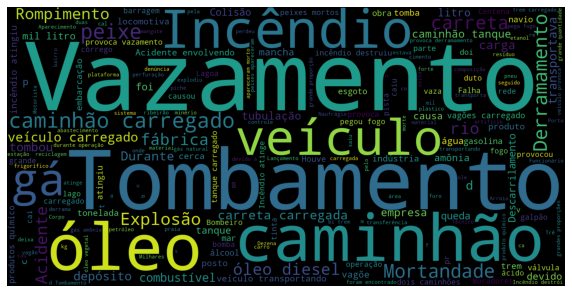

In [7]:
# WordCloud
texto = df['Ocorrencia'].to_string()
stopwords = set(STOPWORDS)
stopwords.update(['da','e','o','a','ocorreu','após', 'meu', 'em', 'você', 'de', 'ao', 'os', 'as', 'na', 'no', 'que', 'seu', 'se', 'não', 'dos', 'das', 'aos','desse','ainda', 'mas','qual','mais','ver','vez','este','ou','nas','também','ter','para','são','sua','ele','ela','um','uma','pois','entre','pode','esse','como','quando','alguns','por','já','essa','outro','outra','muito'])

wordcloud = WordCloud(stopwords = stopwords, background_color='black', width=1600, height=800).generate(texto)

fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)
wordcloud.to_file('WordCloud.png')

In [8]:
ano = dffinal.Ano.value_counts()
uf = dffinal.UF.value_counts()

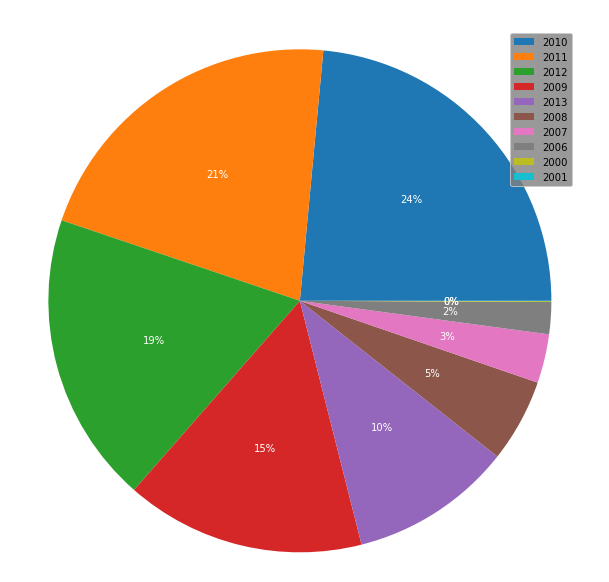

In [9]:
plt.figure(figsize=(10, 10))
plt.title('Quantidade de Ocorrencias por Ano', fontsize=22, color='white')
plt.pie(ano, labels=ano.index, autopct='%1.f%%', textprops=dict(color='white'))
plt.axis('equal')
plt.legend(facecolor='gray')
plt.show
plt.savefig('Piechart_Ano', transparent = True)

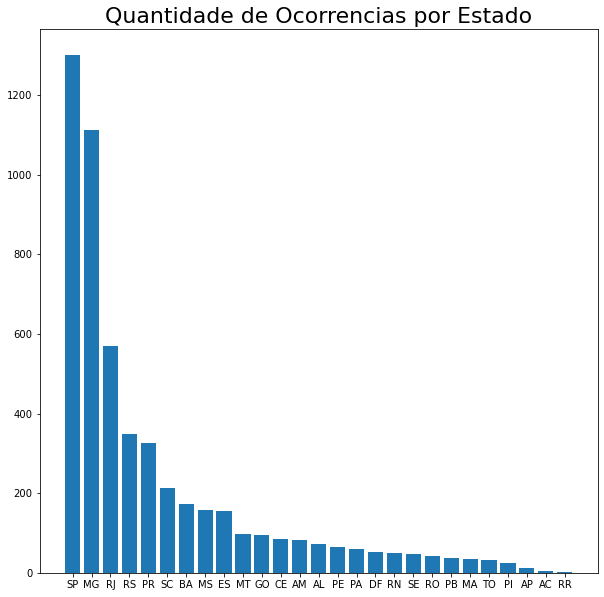

In [10]:
plt.figure(figsize=(10, 10))
plt.title('Quantidade de Ocorrencias por Estado', fontsize=22, color='black')
plt.bar(uf.index, uf, label=uf.index)
#plt.legend(facecolor='gray')
plt.show
plt.savefig('Bars_UF', transparent = True)

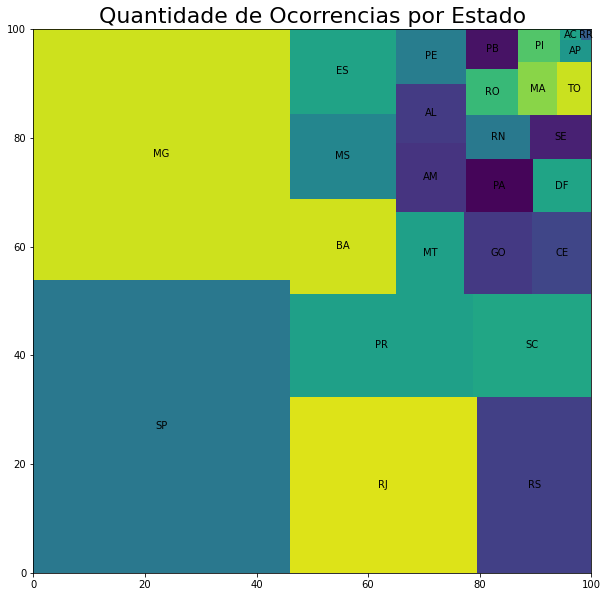

In [11]:
plt.figure(figsize=(10, 10))
plt.title('Quantidade de Ocorrencias por Estado', fontsize=22, color='black')
sqf.plot(sizes = uf, label = uf.index, alpha=1)
plt.savefig('TreeMap_UF.png', transparent = True)


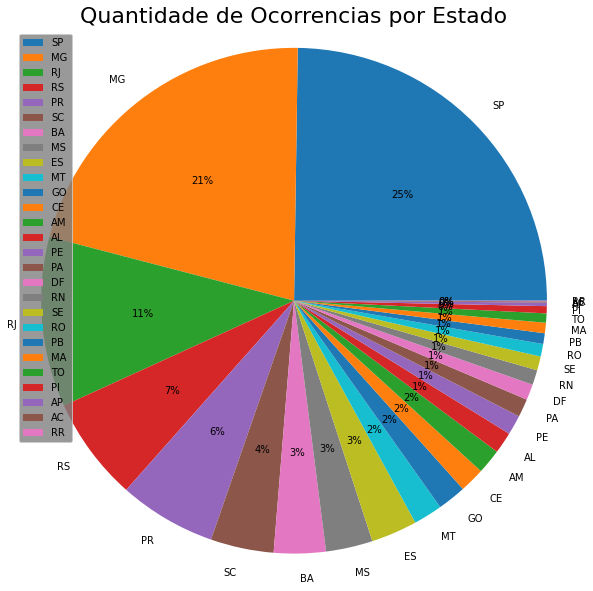

In [16]:
plt.figure(figsize=(10, 10))
plt.title('Quantidade de Ocorrencias por Estado', fontsize=22, color='Black')
plt.pie(uf, labels=uf.index, autopct='%1.f%%', textprops=dict(color='Black'))
plt.axis('equal')
plt.legend(facecolor='gray')
plt.show
plt.savefig('Piechart_UF.png', transparent = True)

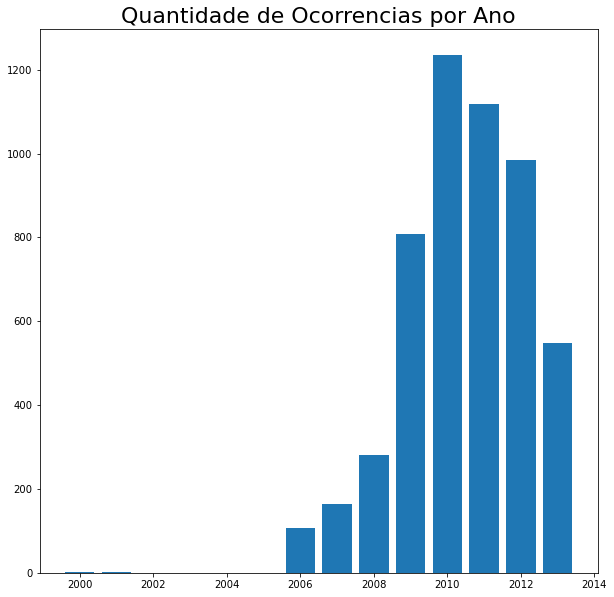

In [13]:
plt.figure(figsize=(10, 10))
plt.title('Quantidade de Ocorrencias por Ano', fontsize=22, color='black')
plt.bar(ano.index, ano)
#plt.legend(facecolor='gray')
plt.show
plt.savefig('Bars_Ano', transparent = True)